In [43]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [49]:
#imports (global)
conf_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv",error_bad_lines=False)
death_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv",error_bad_lines=False)
rec_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv",error_bad_lines=False)
population = pd.read_csv("/content/drive/My Drive/IITK/CS771 Project/ML-Project/total_pop.csv", skiprows = 4)
# population = pd.read_csv('total_pop.csv',skiprows=4)
population = population.iloc[:,[0]+[-2]]
population.rename(columns = {'Country Name':'Country/Region', '2019':'Population'}, inplace=True)

In [50]:
population

,Country/Region,Population
0,Aruba,106314.0
1,Afghanistan,38041754.0
2,Angola,31825295.0
3,Albania,2854191.0
4,Andorra,77142.0
...,...,...
259,Kosovo,1794248.0
260,"Yemen, Rep.",29161922.0
261,South Africa,58558270.0
262,Zambia,17861030.0


In [34]:
#calculating worldwide total
cols = conf_df.keys()
dates = conf_df.loc[:, cols[4]:cols[-1]].keys()
for date in dates:
  conf_total = conf_df[date].sum()
  death_total = death_df[date].sum()

print("Total confirmed cases till {} are {}".format(dates[-1], conf_total))
print("Total deaths till {} are {}".format(dates[-1], death_total))
print("Therefore, mortality rate is {}".format((death_total/conf_total)*100)) 

Total confirmed cases till 12/8/20 are 68225587
Total deaths till 12/8/20 are 1556834
Therefore, mortality rate is 2.2818916896970047


In [51]:
#repetitive country/region

x = rec_df[rec_df['Country/Region'].duplicated(keep=False)]
x['Country/Region'].unique()

# conf_df = conf_df.drop_duplicates(subset='Country/Region', keep="last")
# death_df = death_df.drop_duplicates(subset='Country/Region', keep="last")
# rec_df = rec_df.drop_duplicates(subset='Country/Region', keep="last")
# rec_df

conf_df = conf_df.groupby(by='Country/Region', axis=0, level=None, as_index=False, sort=True, group_keys=True, squeeze=False)[conf_df.columns].sum()
# conf_df[conf_df['Country/Region']=='China']
rec_df = rec_df.groupby(by='Country/Region', axis=0, level=None, as_index=False, sort=True, group_keys=True, squeeze=False)[rec_df.columns].sum()
death_df = death_df.groupby(by='Country/Region', axis=0, level=None, as_index=False, sort=True, group_keys=True, squeeze=False)[death_df.columns].sum()



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: The `squeeze` parameter is deprecated and will be removed in a future version.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: FutureWarning: The `squeeze` parameter is deprecated and will be removed in a future version.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: FutureWarning: The `squeeze` parameter is deprecated and will be removed in a future version.
  


In [ ]:
# rec_df[rec_df['Country/Region']=='US']

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,...,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20
177,US,40.0,-100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,3,3,3,3,3,3,3,3,3,5,5,5,5,6,6,6,...,3578452,3612478,3630579,3674981,3705130,3743527,3781751,3810791,3851465,3881491,3928845,3961873,3997175,4051256,4095146,4148444,4174884,4244811,4293640,4350789,4410709,4457930,4529700,4526513,4633600,4696664,4835956,4871203,4947446,5023063,5065030,5146319,5226581,5322128,5404018,5470389,5576026,5624444,5714557,5786915


Text(0.5, 1.0, 'Top 10 Countries (Confirmed Cases)')

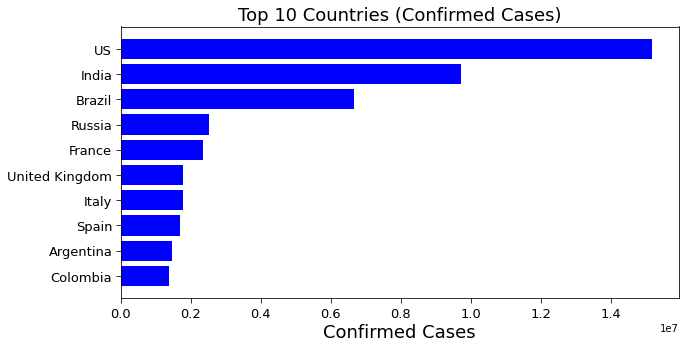

In [36]:
covid_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")
covid_df = covid_df.drop(["People_Tested","People_Hospitalized","UID","ISO3","Mortality_Rate","Lat","Long_"],axis =1)
covid_df["Active"] = covid_df["Confirmed"]-covid_df["Recovered"]-covid_df["Deaths"]

countries = np.asarray(conf_df["Country/Region"])
countries_all = np.asarray(covid_df["Country_Region"])
continent = {'NA': 'North America','SA': 'South America', 'AS': 'Asia','OC': 'Australia','AF': 'Africa','EU' : 'Europe','na' : 'Others'}

def country_to_cont(con):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(con))
    except :
        return 'na'

covid_df.insert(1,"continent",  [continent[country_to_cont(con)] for con in countries_all[:]])

cases_df = covid_df.copy().drop(['continent','Last_Update'],axis =1)

cases_df.index = cases_df["Country_Region"]
cases_df = cases_df.drop(['Country_Region'],axis=1)
cases_df.fillna(0,inplace=True)

import matplotlib.pyplot as plt

x = plt.figure(figsize=(10,5))
plt.axes(axisbelow=True)
plt.barh(cases_df.sort_values('Confirmed')["Confirmed"].index[-10:],cases_df.sort_values('Confirmed')["Confirmed"].values[-10:],color="blue")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title("Top 10 Countries (Confirmed Cases)",fontsize=18)

Text(0.5, 1.0, 'Top 10 Countries (Deaths Cases)')

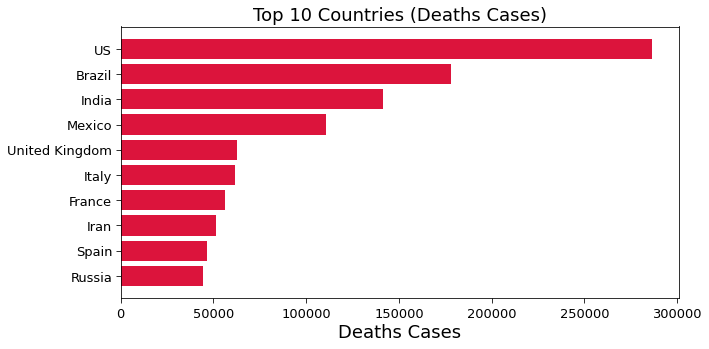

In [27]:
x = plt.figure(figsize=(10,5))
plt.axes(axisbelow=True)
plt.barh(cases_df.sort_values('Deaths')["Deaths"].index[-10:],cases_df.sort_values('Deaths')["Deaths"].values[-10:],color="crimson")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Deaths Cases",fontsize=18)
plt.title("Top 10 Countries (Deaths Cases)",fontsize=18)


Text(0.5, 1.0, 'Top 10 Countries (Active Cases)')

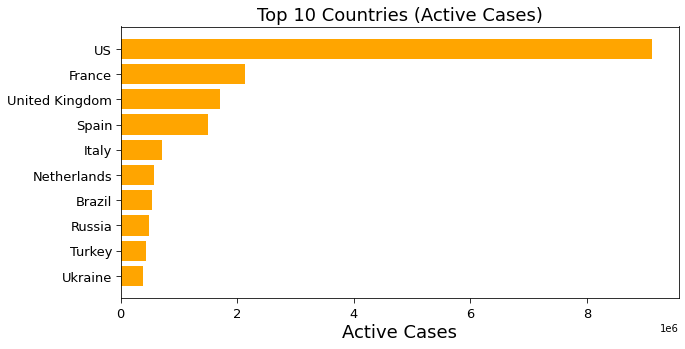

In [28]:
x = plt.figure(figsize=(10,5))
plt.axes(axisbelow=True)
plt.barh(cases_df.sort_values('Active')["Active"].index[-10:],cases_df.sort_values('Active')["Active"].values[-10:],color="orange")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Active Cases",fontsize=18)
plt.title("Top 10 Countries (Active Cases)",fontsize=18)

Text(0.5, 1.0, 'Top 10 Countries (Recovered Cases)')

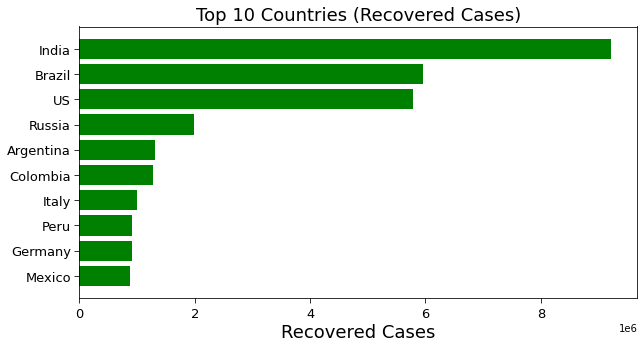

In [29]:
x = plt.figure(figsize=(10,5))
plt.axes(axisbelow=True)
plt.barh(cases_df.sort_values('Recovered')["Recovered"].index[-10:],cases_df.sort_values('Recovered')["Recovered"].values[-10:],color="green")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Recovered Cases",fontsize=18)
plt.title("Top 10 Countries (Recovered Cases)",fontsize=18)

In [52]:
#merging with population data

conf_df = pd.merge(conf_df, population, on=['Country/Region'], how='left')
death_df=pd.merge(death_df, population,how='left' ,on=['Country/Region'])
rec_df=pd.merge(rec_df, population,how='left' ,on=['Country/Region'])

In [53]:
rec_df = rec_df[rec_df['Population'].notna()]
conf_df = conf_df[conf_df['Population'].notna()]
death_df = death_df[death_df['Population'].notna()]

In [ ]:
rec_df

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,...,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,Population
0,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,34321,34326,34342,34355,34362,34440,34440,34446,34458,34721,34954,34967,35024,35036,35067,35092,35137,35160,35295,35350,35370,35422,35934,35976,36122,36145,36232,36295,36709,36716,36831,36946,37218,37260,37260,37393,37685,37879,37920,38041754.0
1,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,11189,11246,11367,11473,11578,11696,11861,12002,12092,12203,12353,12493,12574,12667,12767,12889,13453,13804,14216,14565,15055,15469,15842,16230,16666,17031,17352,17755,18152,18481,18849,19384,19912,20484,20974,21286,21617,22180,22527,2854191.0
2,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,40201,40395,40577,40577,41001,41244,41510,41783,42037,42325,42626,42980,42980,43779,44199,44633,45148,45148,46326,46962,47581,48183,48794,49421,50070,50712,51334,51946,52568,53204,53809,54405,54990,55538,56079,56617,57146,57648,58146,43053054.0
3,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3475,3475,3548,3627,3734,3858,3858,4043,4248,4332,4405,4488,4585,4675,4675,4747,4830,4965,5055,5127,5239,5290,5358,5405,5503,5542,5649,5710,5710,5794,5873,5940,5988,6066,6130,6171,6238,6293,6367,77142.0
4,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4523,4920,5172,5230,5266,5350,5626,5647,5899,5927,6036,6125,6250,6326,6345,6444,6523,6582,6623,7062,7117,7273,7346,7351,7444,7517,7617,7697,7763,7763,7851,7932,8139,8244,8299,8335,8338,8353,8470,31825295.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,Vanuatu,-15.376700,166.959200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,299882.0
186,Vietnam,14.058324,108.277199,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,6,6,7,7,7,7,7,7,7,7,14,14,14,14,16,16,16,...,1062,1063,1065,1069,1069,1069,1070,1070,1070,1087,1087,1087,1093,1101,1103,1103,1124,1124,1124,1142,1142,1142,1142,1151,1153,1153,1166,1170,1179,1179,1179,1195,1201,1209,1220,1220,1220,1224,1224,96462106.0
187,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,46309,46773,47169,47744,48224,48680,49537,49975,50407,50877,51425,52226,52861,53367,53791,54346,54953,55684,56843,57469,57879,58383,59021,59538,60009,60499,61241,61960,62944,63834,64987,65938,66989,68250,70206,71236,72773,74053,75257,4685306.0
189,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15680,15733,15733,15763,15819,15827,15862,15873,15950,16011,16019,16070,16102,16134,16137,16137,16400,16473,16495,16591,16606,16659,16701,16701,16707,16755,16779,16845,16925,16983,16998,17059,17086,17102,17145,17168,17173,17211,17268,17861030.0


In [54]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Lat', 'Long','Population'], axis=1)
  ts.set_index('Country/Region')
  ts=ts.T
  ts.columns=ts.loc['Country/Region']
  ts=ts.drop('Country/Region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [55]:
ts=create_ts(conf_df)
ts_d=create_ts(death_df)
ts_rec=create_ts(rec_df)


In [ ]:
ts

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Bulgaria,Burkina Faso,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Costa Rica,Cote d'Ivoire,Croatia,Cuba,...,Samoa,San Marino,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Vietnam,West Bank and Gaza,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/4/20,46837,41302,86730,6955,15493,144,1454631,139692,27956,297245,138000,87600,473991,284,143383,587439,7383,3055,424,145325,92793,11531,6533968,158807,3091,692,10996,345,24752,406189,4918,1719,557135,93348,1352607,615,143685,21412,143370,8610,...,2,1756,999,358336,16297,206940,184,2420,58242,83133,17,4525,805804,3154,1684647,26559,18535,5322,278912,344497,12349,509,4072,31,3051,6735,101900,765997,14367377,21898,808828,174062,1694800,6731,73751,1,1361,94676,17857,10547
12/5/20,47072,42148,87502,7005,15536,144,1459832,140959,27965,300689,142323,87732,475789,285,145279,589942,7601,3055,426,145492,93768,11531,6577177,160844,3156,694,11036,346,24752,412543,4922,1722,558668,93467,1362249,616,143685,21441,147454,8714,...,2,1789,999,358526,16397,213843,184,2420,58255,84775,17,4525,810449,3166,1684647,27228,19196,5324,278912,344497,12389,509,4086,31,3051,6751,102991,797893,14581243,22188,822985,175276,1710379,6965,73751,1,1365,96098,17898,10617
12/6/20,47306,42988,88252,7050,15591,144,1463110,141937,27972,303430,146679,87930,477545,285,147157,591756,7769,3055,430,145560,94507,11531,6603540,161421,3212,694,11063,348,24752,418848,4922,1725,560382,93577,1371103,616,143685,21485,150353,8782,...,2,1789,999,358713,16477,219652,184,2426,58260,85805,17,4525,814565,3181,1684647,27877,19468,5324,278912,344497,12428,509,4107,31,3095,6767,104002,828295,14756883,22499,834913,176429,1727751,7303,74053,1,1366,98038,17916,10718
12/7/20,47516,43683,88825,7084,15648,146,1466309,142344,27987,305693,149765,88111,479743,287,148953,592615,7953,3073,432,145657,94944,12058,6623911,164185,3315,698,11098,350,24752,426572,4922,1728,562142,93670,1377100,616,146421,21507,152239,8906,...,2,1800,1002,358922,16553,226209,184,2428,58273,86288,17,4579,817878,3181,1702328,28580,19747,5325,278912,354306,12469,509,4126,31,3111,6775,104329,860432,14949299,23200,843898,177577,1742525,7505,74053,1,1367,99758,17931,10839


Country/Region        US    India   Brazil  ...  Marshall Islands  Samoa  Vanuatu
1/22/20                1        0        0  ...                 0      0        0
1/23/20                1        0        0  ...                 0      0        0
1/24/20                2        0        0  ...                 0      0        0
1/25/20                2        0        0  ...                 0      0        0
1/26/20                5        0        0  ...                 0      0        0
...                  ...      ...      ...  ...               ...    ...      ...
12/4/20         14367377  9608211  6533968  ...                 4      2        1
12/5/20         14581243  9644222  6577177  ...                 4      2        1
12/6/20         14756883  9677203  6603540  ...                 4      2        1
12/7/20         14949299  9703770  6623911  ...                 4      2        1
12/8/20         15165159  9735850  6674999  ...                 4      2        1

[322 rows x 166

Text(0.5, 1.0, 'Daily Total Recovered - Major Areas Worldwide')

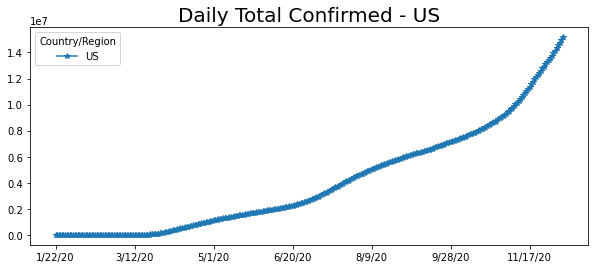

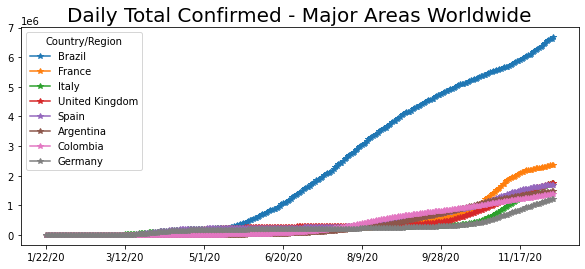

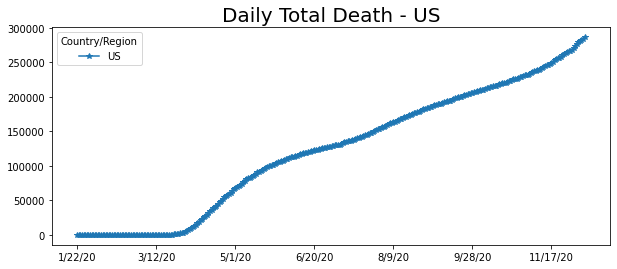

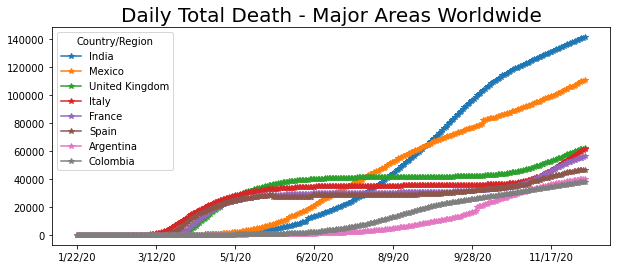

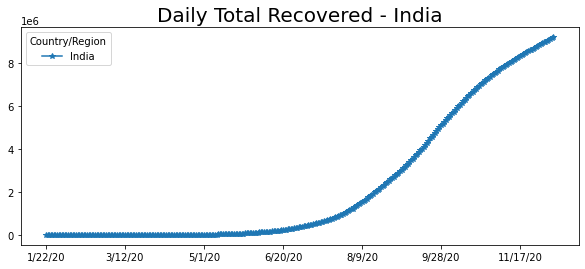

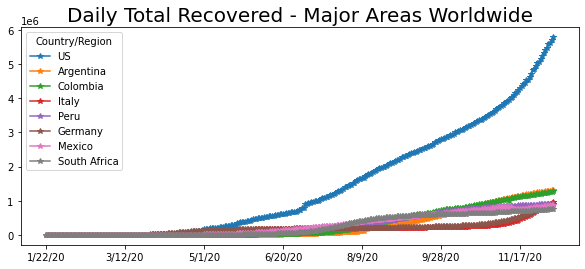

In [56]:
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
print(p)
p.iloc[:,:1].plot(marker='*',figsize=(10,4)).set_title('Daily Total Confirmed - US',fontdict={'fontsize': 20})
p.iloc[:,2:10].plot(marker='*',figsize=(10,4)).set_title('Daily Total Confirmed - Major Areas Worldwide',fontdict={'fontsize': 20})

p_d=ts_d.reindex(ts_d.max().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,:1].plot(marker='*',figsize=(10,4)).set_title('Daily Total Death - US',fontdict={'fontsize': 20})
p_d.iloc[:,2:10].plot(marker='*',figsize=(10,4)).set_title('Daily Total Death - Major Areas Worldwide',fontdict={'fontsize': 20})

p_r=ts_rec.reindex(ts_rec.max().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,:1].plot(marker='*',figsize=(10,4)).set_title('Daily Total Recovered - India',fontdict={'fontsize': 20})
p_r.iloc[:,2:10].plot(marker='*',figsize=(10,4)).set_title('Daily Total Recovered - Major Areas Worldwide',fontdict={'fontsize': 20})

In [57]:
##Kalman Filter

# Create confirmed cases data for R script
ts_r=ts.reset_index()
ts_r=ts_r.rename(columns = {'index':'date'})
ts_r['date']=pd.to_datetime(ts_r['date'] ,errors ='coerce')
ts_r.to_csv('/content/drive/My Drive/IITK/CS771 Project/file.csv')

In [58]:
import rpy2
%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


In [59]:
%%R
install.packages('pracma')
install.packages('reshape')

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/pracma_2.2.9.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 400551 bytes (391 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write

In [60]:
%%R
require(pracma)
require(Metrics)
require(readr)
#input is number of confirmed cases for each day
all_con <- read_csv("/content/drive/My Drive/IITK/CS771 Project/file.csv")
all_con$X1 <-NULL    #add new column X1 to dataframe
date<-all_con[,1]     #get date column
date[nrow(date) + 1,1] <-all_con[nrow(all_con),1]+1   #add an extra row for an extra date
pred_all<-NULL

for (n in 2:ncol(all_con)-1)
{
  Y<-ts(data = all_con[n+1], start = 1, end =nrow(all_con)+1)   #timeseries object <- ts(data, start, end, frequency=1)
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gamma<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01     # number of infectious individuals or transmissibility rate which is represented by reproduction number
  X<-NULL     #initialization of particles 
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all_con))
  {
    namep <-paste("p", i+1,"_",i, sep = "")    #namep = pi+1_i
    assign(namep, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gamma%*%Q%*%t(gamma)) #namep = ([phi] * pi_i) * (([phi]^T + gamma) * Q * gamma^T)
    namek <- paste("k", i+1, sep = "")  #namek = ki+1
    assign(namek,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namex <- paste("x", i+1,"_",i, sep = "") 
    assign(namex,phi%*%get(paste("x", i,"_",i, sep = "")))
    nameE <- paste("E", i+1, sep = "")
    assign(nameE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namex2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namex2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namep2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namep2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])    #combine by rows
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2)
    {
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))
      }
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all_con[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
  pred_all
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: pracma

R[write to console]: Loading required package: Metrics

R[write to console]: Loading required package: readr

R[write to console]: 
── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  date = col_date(format = "")
)
ℹ Use `spec()` for the full column specifications.




In [61]:
p=%R pred_all
p

,Y,X,X2
1,0.0,0.000000,0.0000
2,0.0,0.000000,0.0000
3,0.0,0.000000,0.0000
4,0.0,0.000000,0.0000
5,0.0,0.000000,0.0000
...,...,...,...
53614,10617.0,10628.452684,295.2150
53615,10718.0,10754.234257,291.4610
53616,10839.0,10863.038659,279.5837
53617,10912.0,10974.021792,271.7040


In [62]:
#death time series back to 3 column dataframe
#t=ts_d
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'Country/Region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['Country/Region', 'date'])

temp=t.iloc[:,:3]
#1 extra day for prediction
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['Country/Region', 'date'])
temp=temp.reset_index(drop=True)
p = p.reset_index(drop=True)
temp['Y']= p['Y']
temp['X']= p['X']
temp['X2']= p['X2']

In [ ]:
temp

,date,Country/Region,confirmed,Y,X,X2
0,2020-01-22,Afghanistan,0,0.0,0.000000,0.0000
1,2020-01-23,Afghanistan,0,0.0,0.000000,0.0000
2,2020-01-24,Afghanistan,0,0.0,0.000000,0.0000
3,2020-01-25,Afghanistan,0,0.0,0.000000,0.0000
4,2020-01-26,Afghanistan,0,0.0,0.000000,0.0000
...,...,...,...,...,...,...
53613,2020-12-05,Zimbabwe,10617,10617.0,10628.452684,295.2150
53614,2020-12-06,Zimbabwe,10718,10718.0,10754.234257,291.4610
53615,2020-12-07,Zimbabwe,10839,10839.0,10863.038659,279.5837
53616,2020-12-08,Zimbabwe,10912,10912.0,10974.021792,271.7040


In [63]:
#confirmed cases
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'Country/Region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['Country/Region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(t.iloc[i,1] is not t.iloc[i-1,1]):
    t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['Country/Region', 'date'])
t=t.reset_index(drop=True)

In [ ]:
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
for i in range(1,len(t)):
  if(t.iloc[i,1] is t.iloc[i-2,1]):
    t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
    t.iloc[i,6]=(t.iloc[i-1,2]/t.iloc[i-2,2]-1)*100
    t.iloc[i,9]=t.iloc[i-1,2]
  if(t.iloc[i,1] is t.iloc[i-4,1]):
    t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
    t.iloc[i,7]=(t.iloc[i-1,2]/t.iloc[i-4,2]-1)*100
  if(t.iloc[i,1] is t.iloc[i-8,1]):
    t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
    t.iloc[i,8]=(t.iloc[i-1,2]/t.iloc[i-8,2]-1)*100

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in long_scalars
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in long_scalars
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in long_scalars
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in long_scalars
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':


In [ ]:
import numpy as np
t=t.fillna(0)  
t=t.merge(temp[['date','Country/Region', 'X']],how='left',on=['date','Country/Region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)
t['kalman_prediction']=round(t['kalman_prediction'])
train=t.merge(conf_df[['Country/Region','Population']],how='left',on='Country/Region')
train['infected_rate'] =train['last_day']/train['Population']*10000
train=train.sort_values(['Country/Region', 'date'])
train

,date,Country/Region,confirmed,1_day_change,3_day_change,7_day_change,1_day_change_rate,3_day_change_rate,7_day_change_rate,last_day,kalman_prediction,Population,infected_rate
0,2020-01-22,Afghanistan,0,0,0,0,0.000000,0.000000,0.000000,0,0.0,38041754.0,0.000000
1,2020-01-23,Afghanistan,0,0,0,0,0.000000,0.000000,0.000000,0,0.0,38041754.0,0.000000
2,2020-01-24,Afghanistan,0,0,0,0,0.000000,0.000000,0.000000,0,0.0,38041754.0,0.000000
3,2020-01-25,Afghanistan,0,0,0,0,0.000000,0.000000,0.000000,0,0.0,38041754.0,0.000000
4,2020-01-26,Afghanistan,0,0,0,0,0.000000,0.000000,0.000000,0,0.0,38041754.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53613,2020-12-05,Zimbabwe,10617,123,418,833,1.179969,4.126765,8.575252,10547,10628.0,14645468.0,7.201545
53614,2020-12-06,Zimbabwe,10718,70,488,795,0.663696,4.817850,8.094075,10617,10754.0,14645468.0,7.249342
53615,2020-12-07,Zimbabwe,10839,101,294,896,0.951305,2.820414,9.122378,10718,10863.0,14645468.0,7.318305
53616,2020-12-08,Zimbabwe,10912,121,292,889,1.128942,2.768560,8.934673,10839,10974.0,14645468.0,7.400924


   Country/Region           rmse           mae
68          India  544633.630168  34418.003106


,date,Country/Region,confirmed,kalman_prediction
22277,2020-11-30,India,9462809,9476650.0
22278,2020-12-01,India,9499413,9510179.0
22279,2020-12-02,India,9534964,9543563.0
22280,2020-12-03,India,9571559,9576696.0
22281,2020-12-04,India,9608211,9610697.0
22282,2020-12-05,India,9644222,9645575.0
22283,2020-12-06,India,9677203,9680785.0
22284,2020-12-07,India,9703770,9714421.0
22285,2020-12-08,India,9735850,9743167.0
22286,2020-12-09,India,0,9772399.0


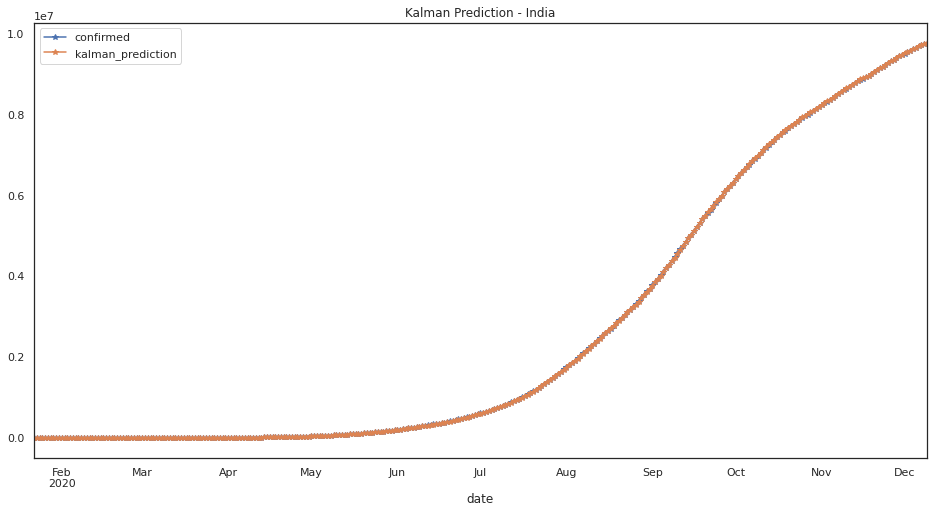

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
# Select region
region='India'

evaluation=pd.DataFrame(columns=['Country/Region','rmse','mae'])

for i in range(1,len(t)):
  if(t.iloc[i,1] is not t.iloc[i-1,1]):
    ex=np.array(t.iloc[i-len(ts):i,10])
    pred=np.array(t.iloc[i-len(ts):i,2])
    evaluation=evaluation.append({'Country/Region': t.iloc[i-1,1], 'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['Country/Region']==region][['date','Country/Region','confirmed','kalman_prediction']]
# p=p.rename(columns = {'confirmed':'recovered'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='*',figsize=(16,8)).set_title('Kalman Prediction - {}'.format(p.iloc[0,0]))
print(evaluation[evaluation['Country/Region']==p.iloc[0,0]])

p=t[t['Country/Region']==region][['date','Country/Region','confirmed','kalman_prediction']]
p.tail(10)

   Country/Region         rmse        mae
33          China  5351.227697  587.89441


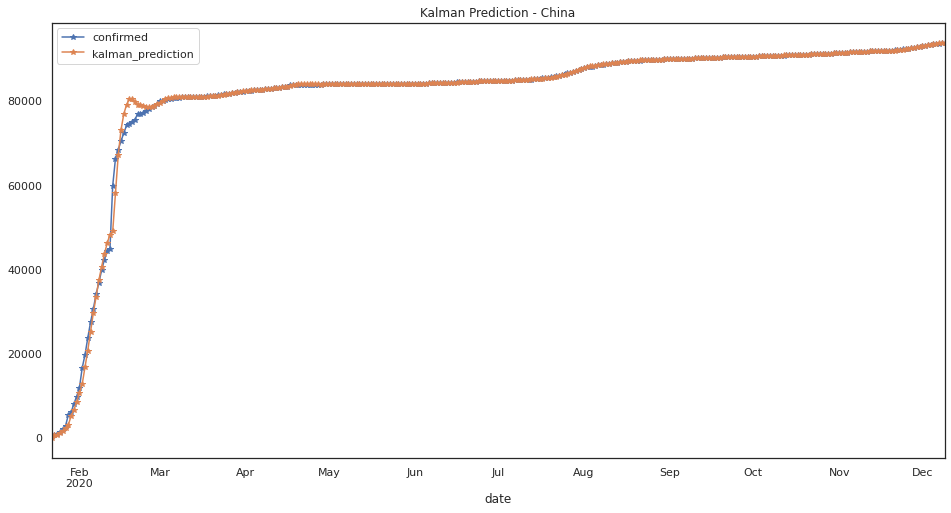

In [ ]:
region='China'

evaluation=pd.DataFrame(columns=['Country/Region','rmse','mae'])

for i in range(1,len(t)):
  if(t.iloc[i,1] is not t.iloc[i-1,1]):
    ex=np.array(t.iloc[i-len(ts):i,10])
    pred=np.array(t.iloc[i-len(ts):i,2])
    evaluation=evaluation.append({'Country/Region': t.iloc[i-1,1], 'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['Country/Region']==region][['date','Country/Region','confirmed','kalman_prediction']]
# p=p.rename(columns = {'confirmed':'recovered'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='*',figsize=(16,8)).set_title('Kalman Prediction - {}'.format(p.iloc[0,0]))
print(evaluation[evaluation['Country/Region']==p.iloc[0,0]])

In [ ]:
# !pip install h2o
# import h2o
# from h2o.estimators import H2ORandomForestEstimator
# from h2o.estimators.glm import H2OGeneralizedLinearEstimator
# from h2o.grid.grid_search import H2OGridSearch
# h2o.init(min_mem_size='8G')
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.model_selection import train_test_split
train=train.fillna(0) 
train_df=train[train['date']<'2020-12-6']
boots=train_df[train_df['date']>='2020-12-3'] # some bootstrap to give more weight for recent days
train_df=train_df.append([boots[boots['date']>='2020-12-3']]*1000,ignore_index=True)
train_df_india=train_df[train_df['Country/Region']=='India']
test=train[train['date']>='2020-12-6']
test=test[test['date']<='2020-12-7']

x_col=['1_day_change', '3_day_change','7_day_change',
             '7_day_change_rate', 
            'last_day', 'kalman_prediction','infected_rate']

x=train_df_india[x_col]
y=train_df_india['confirmed']
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
reg = LinearRegression().fit(X_train,y_train)

pred2=reg.predict(X_test)
pred2=pd.DataFrame(pred2)
pred2=round(pred2)
# pred2['confirmed']=test['confirmed'].values; pred2['date']=test['date'].values; pred2['Country/Region']=test['Country/Region'].values
# #pred2.iloc[:55]

In [ ]:
%%R
require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("/content/drive/My Drive/IITK/CS771 Project/file.csv")
all$X1<-NULL
for (i in 1:30) { # Set i days prediction
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "Country/Region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

R[write to console]: Loading required package: Metrics

R[write to console]: 
── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  date = col_date(format = "")
)
ℹ Use `spec()` for the full column specifications.




In [ ]:
all_new=%R all_new
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - China')

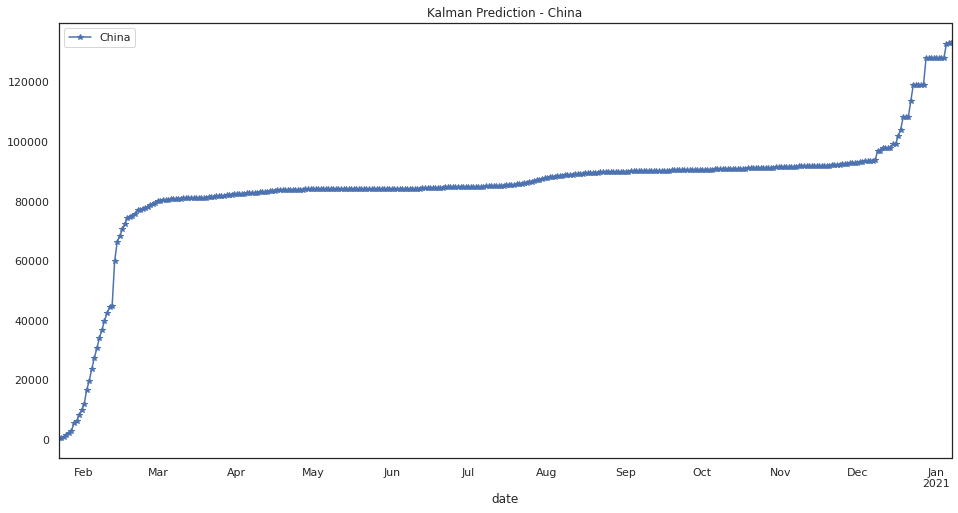

In [ ]:
region=["date","China"]

p_kalman2=all_new[['date','China']]
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='*',figsize=(16,8)).set_title('Kalman Prediction - {}'.format(p_kalman2.columns[0]))

In [ ]:
p_kalman2.tail(30)

,China
date,
2020-12-09,97020.0
2020-12-10,97020.0
2020-12-11,97945.0
2020-12-12,97945.0
2020-12-13,97945.0
2020-12-14,97945.0
2020-12-15,99121.0
2020-12-16,99121.0
2020-12-17,101773.0
